In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip show notebook pandas numpy scikit-learn matplotlib seaborn ipywidgets

Name: notebookNote: you may need to restart the kernel to use updated packages.

Version: 7.0.8
Summary: Jupyter Notebook - A web-based notebook environment for interactive computing
Home-page: 
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License

- Copyright (c) 2001-2015, IPython Development Team
- Copyright (c) 2015-, Jupyter Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be

In [4]:
pip install streamlit ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [39]:
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import uuid

In [5]:
# Data Collection and Loading
def load_data():
    """
    Load and create sample retail sales dataset
    In real-world, replace with actual dataset (e.g., CSV file from retail system)
    """
    np.random.seed(42)
    dates = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')
    n = len(dates)
    
    data = {
        'date': dates,
        'sales_quantity': 100 + np.sin(np.arange(n) * 0.02) * 20 + np.random.normal(0, 5, n),
        'price': 10 + np.random.normal(0, 1, n),
        'temperature': 20 + np.sin(np.arange(n) * 0.017) * 10 + np.random.normal(0, 2, n),
        'promotion': np.random.choice([0, 1], size=n, p=[0.8, 0.2]),
        'holiday': np.random.choice([0, 1], size=n, p=[0.9, 0.1])
    }
    df = pd.DataFrame(data)
    return df
    

In [27]:
df = load_data()
df.head()  # Displays as a table

,date,sales_quantity,price,temperature,promotion,holiday
0,2022-01-01,102.483571,10.078635,24.048619,0,1
1,2022-01-02,99.708652,8.001799,17.443644,0,0
2,2022-01-03,104.038229,10.916328,20.719347,0,0
3,2022-01-04,108.814429,10.346488,19.185815,1,0
4,2022-01-05,100.427527,10.998010,21.531250,0,0


In [7]:

# Data Preprocessing
def preprocess_data(df):
    """
    Clean and prepare data for modeling
    """
    # Handle missing values
    df = df.fillna(df.mean(numeric_only=True))
    
    # Feature engineering
    df['date'] = pd.to_datetime(df['date'])
    df['day_of_week'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['quarter'] = df['date'].dt.quarter
    
    # Create lag features (previous day's sales)
    df['sales_lag_1'] = df['sales_quantity'].shift(1)
    df['sales_lag_7'] = df['sales_quantity'].shift(7)
    
    # Drop rows with NaN values created by lagging
    df = df.dropna()
    
    return df

In [9]:

#  Feature Selection
def select_features(df):
    """
    Select relevant features for modeling
    """
    features = [
        'price',
        'temperature',
        'promotion',
        'holiday',
        'day_of_week',
        'month',
        'year',
        'is_weekend',
        'quarter',
        'sales_lag_1',
        'sales_lag_7'
    ]
    target = 'sales_quantity'
    
    X = df[features]
    y = df[target]
    
    return X, y, features

In [11]:
#  Data Splitting and Scaling
def split_and_scale_data(X, y):
    """
    Split data into training and testing sets and scale features
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [13]:

# Model Training
def train_model(X_train, y_train):
    """
    Train Random Forest Regressor model
    """
    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    return model

In [15]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    """
    Evaluate model performance
    """
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared Score: {r2:.2f}")
    
    return y_pred, mse, r2

In [31]:
# Visualization
def visualize_results(y_test, y_pred, feature_importance, features):
    """
    Create visualizations for model results
    """
    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Demand', alpha=0.7)
    plt.plot(y_pred, label='Predicted Demand', alpha=0.7)
    plt.title('Actual vs Predicted Demand')
    plt.xlabel('Test Sample Index')
    plt.ylabel('Demand')
    plt.legend()
    plt.savefig('actual_vs_predicted.png')
    plt.show()
    plt.close()
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.savefig('feature_importance.png')
    plt.show()
    plt.close()


Step 1: Loading data...
Step 2: Preprocessing data...
Step 3: Selecting features...
Step 4: Splitting and scaling data...
Step 5: Training model...
Step 6: Evaluating model...
Mean Squared Error: 39.46
R-squared Score: 0.77

Feature Importance:
        feature  importance
9   sales_lag_1    0.760266
10  sales_lag_7    0.162451
0         price    0.026072
1   temperature    0.021546
4   day_of_week    0.009459
5         month    0.008863
6          year    0.003682
2     promotion    0.002634
8       quarter    0.002569
3       holiday    0.001421
7    is_weekend    0.001036
Step 7: Visualizing results...


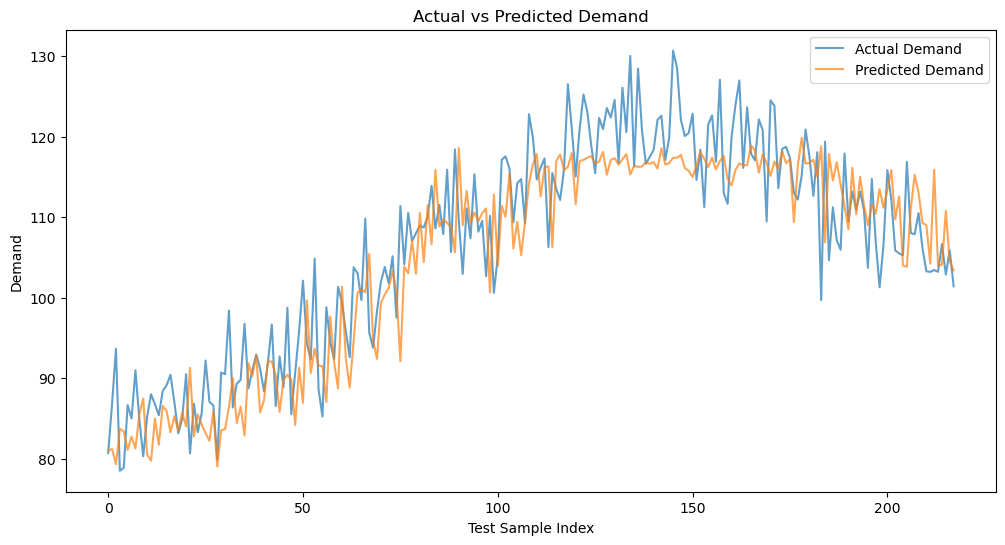

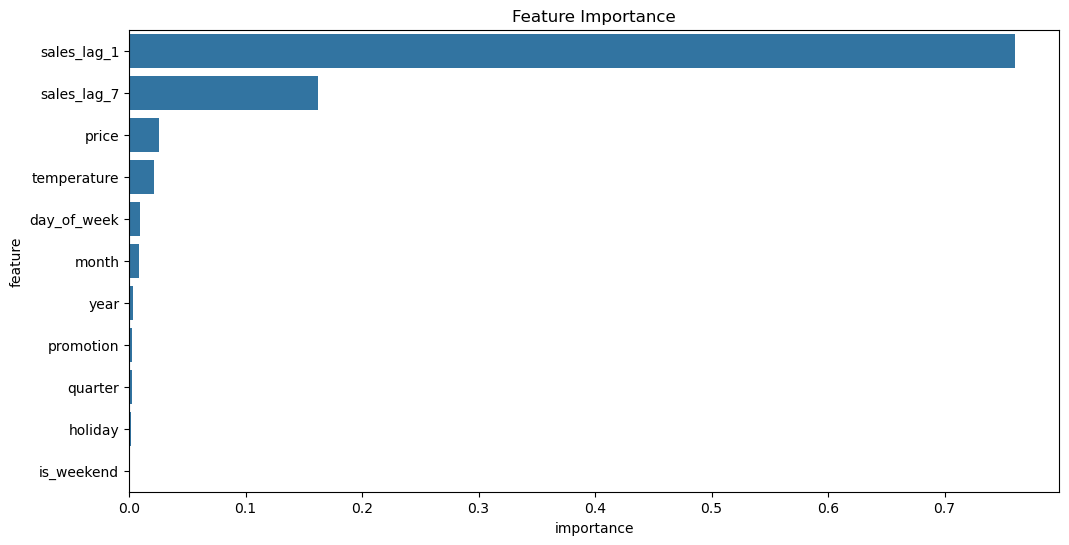


Project completed! Check 'actual_vs_predicted.png' and 'feature_importance.png' for visualizations.


In [33]:
# Main execution
def main():
    # Generate unique artifact ID
    artifact_id = str(uuid.uuid4())
    
    # Execute pipeline
    print("Step 1: Loading data...")
    df = load_data()
    
    print("Step 2: Preprocessing data...")
    df = preprocess_data(df)
    
    print("Step 3: Selecting features...")
    X, y, features = select_features(df)
    
    print("Step 4: Splitting and scaling data...")
    X_train_scaled, X_test_scaled, y_train, y_test = split_and_scale_data(X, y)
    
    print("Step 5: Training model...")
    model = train_model(X_train_scaled, y_train)
    
    print("Step 6: Evaluating model...")
    y_pred, mse, r2 = evaluate_model(model, X_test_scaled, y_test)
    
    # Calculate feature importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    print("Step 7: Visualizing results...")
    visualize_results(y_test, y_pred, feature_importance, features)
    
    print("\nProject completed! Check 'actual_vs_predicted.png' and 'feature_importance.png' for visualizations.")

if __name__ == "__main__":
    main()